# Figure 3.03 Michaelis-Menten kinetics

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.gr(lw=2)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


Plots.GRBackend()

In [2]:
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
@parameters eT k1 km1 k2
@variables t S(t) ES(t) P(t) eFree(t) v1(t) v2(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [4]:
@named fullSys = ODESystem([
    eFree ~ eT - ES,
    v1 ~ k1 * S * eFree - km1 * ES,
    v2 ~ k2 * ES,
    D(S) ~ -v1,
    D(ES) ~ v1 - v2,
    D(P) ~ v2
])

Model fullSys with 6 equations
States (6):
  S(t)
  ES(t)
  P(t)
  eFree(t)
  v1(t)
  v2(t)
Parameters (4):
  eT
  km1
  k1
  k2

In [5]:
fullSys = structural_simplify(fullSys)

Model fullSys with 3 equations
States (3):
  S(t)
  ES(t)
  P(t)
Parameters (4):
  eT
  km1
  k1
  k2
Incidence matrix:
 ×  ⋅  ⋅  ×  ×  ⋅
 ⋅  ×  ⋅  ×  ×  ⋅
 ⋅  ⋅  ×  ⋅  ×  ⋅

In [6]:
# Apply QSSA on the ES complex to somplify the model
@named simpSys = ODESystem([
    D(S) ~ -k2 * eT * hill(S, (km1 + k2) / k1),
])

Model simpSys with 1 equations
States (1):
  S(t)
Parameters (4):
  km1
  k1
  eT
  k2

In [7]:
u0 = [S => 5.0, ES => 0.0, P => 0.0]
tend = 1.0
params = [eT => 1.0, k1 => 30.0, km1 => 1.0, k2 => 10.0]
sol = solve(ODEProblem(fullSys, u0, tend, params))

retcode: Success
Interpolation: automatic order switching interpolation
t: 40-element Vector{Float64}:
 0.0
 6.665333466693315e-6
 7.331866813362645e-5
 0.000486426530181811
 0.0012463105335874984
 0.002255916533051079
 0.0036389201205414856
 0.0054558339005407915
 0.007824958909241769
 0.01084076598994703
 0.0146219019713246
 0.01927740163785426
 0.024945076627481008
 ⋮
 0.4852116362040185
 0.5402010718115909
 0.5962934709931191
 0.6498572095496072
 0.6992361018633796
 0.7455746779351546
 0.7903699070118637
 0.8349925600307094
 0.8806909882547767
 0.928657896443503
 0.9801091431656057
 1.0
u: 40-element Vector{Vector{Float64}}:
 [5.0, 0.0, 0.0]
 [4.999000802751873, 0.000999163942258781, 3.330586857606658e-8]
 [4.989074749914229, 0.010921237104096313, 4.012981675171874e-6]
 [4.930127941487401, 0.0696999425627043, 0.00017211594989572642]
 [4.83222624731284, 0.16669488457593237, 0.0010788681112279999]
 [4.720095581033622, 0.2765713220296976, 0.00333309693668064]
 [4.593086932342045, 0.39

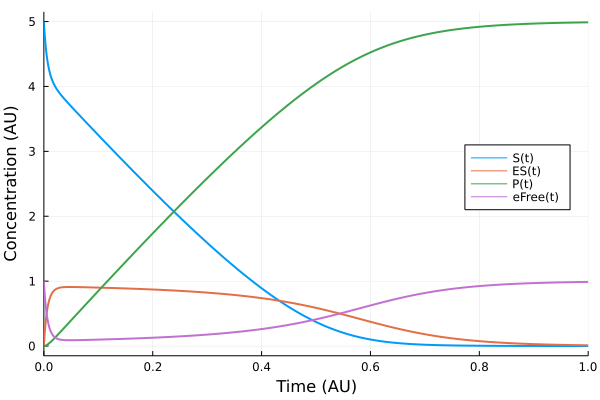

In [8]:
p1 = plot(sol, vars=[S, ES, P, eFree], xlabel="Time (AU)", ylabel="Concentration (AU)", legend=:right)

In [9]:
solsimp = solve(ODEProblem(simpSys, u0, tend, params))

retcode: Success
Interpolation: automatic order switching interpolation
t: 15-element Vector{Float64}:
 0.0
 0.08829951015219592
 0.29677254913999207
 0.500000468671217
 0.6196473837012987
 0.667010430092469
 0.7099274959046816
 0.7465737429986002
 0.7827003061957977
 0.8170029037689358
 0.851532481230377
 0.8866728238828602
 0.9240248948050929
 0.9646817032350656
 1.0
u: 15-element Vector{Vector{Float64}}:
 [5.0]
 [4.182468228248958]
 [2.3146741513235356]
 [0.7140967899079597]
 [0.13296506121927512]
 [0.046302524580241256]
 [0.01563176613015049]
 [0.005910626885835261]
 [0.0022299125570656034]
 [0.0008784938222887489]
 [0.00034320151568757197]
 [0.00013175532009879323]
 [4.761597847782403e-5]
 [1.5733015129580863e-5]
 [6.0074984477308984e-6]

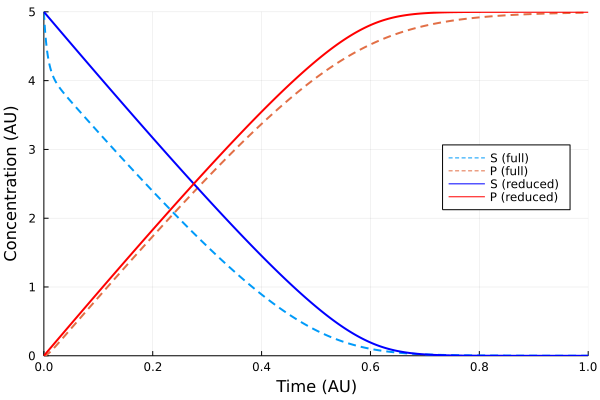

In [10]:
p2 = plot(sol, vars=[1, 3], line=(:dash), label=["S (full)" "P (full)"])
plot!(p2, solsimp, line=(:blue), lab="S (reduced)")
plot!(p2, solsimp, vars=((t, s)->(t, 5.0 - s), 0, 1), line=(:red), lab="P (reduced)")
plot!(p2, xlabel="Time (AU)",  ylabel="Concentration (AU)", xlims=(0.0,1.0), ylims=(0.0,5.0), legend = :right)